In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [47]:
X, Y = make_blobs(n_samples=1000, n_features=2, centers=2, random_state=2)

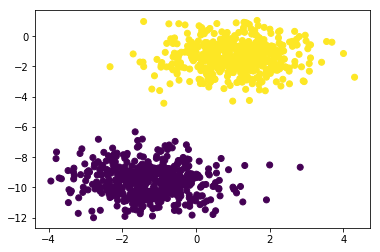

In [48]:
plt.scatter(X[:, 0], X[:, 1], c = Y)

In [69]:
def sigmoid(z):
    return 1 / ( 1 + np.exp(-z))

def hypothesis(x, theta):
    z = np.dot(x, theta)
    return sigmoid(z)

In [70]:
# theta = np.array([5])

# data = np.linspace(-5, 5, 100)

# y = []

# for x in data:
#     y.append(hypothesis(x, theta))
    
# plt.plot(data, y)

In [77]:
class LogisticRegression:
    
    def __init__(self, X, Y, lr, itrs):
        self.X_train = self.process(X)
        self.Y_train = Y
        self.theta = np.zeros([self.X_train.shape[1]])
        self.lr = lr
        self.itrs = itrs
        
    def process(self, data):
        data = np.hstack([np.ones([data.shape[0], 1]), data])
        return data
    
    def regression(self):
        gradient = np.zeros_like(self.theta)
        
        for xi, yi in zip(self.X_train, self.Y_train):
            gradient += (yi - hypothesis(xi, self.theta)) * xi
            
        gradient = gradient * self.lr / self.X_train.shape[0]
        
        self.theta += gradient
        
    def loss(self):
        
        log_like = 0
        for xi, yi in zip(self.X_train, self.Y_train):
            
            first = (yi * np.log(hypothesis(xi, self.theta)))
            second = ((1 - yi) * np.log(1 - hypothesis(xi, self.theta)))
            
            log_like +=  (first + second)
        
        self.lr = - ( .1 + log_like)
        
        print(self.lr)
        
        return - log_like
    
    def run(self):
        
        losses = []
        
        for i in range(self.itrs):
            self.regression()
            losses.append(self.loss() / self.X_train.shape[0])
        
        return losses 
            
        
        
        

5889.798104992915
nan
nan
nan
nan
nan
nan


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


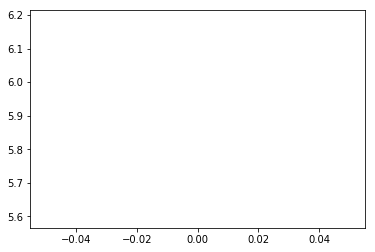

In [78]:
model = LogisticRegression(X, Y, 5, 100)
losses = model.run()

plt.plot(losses)

[7.70073606 1.16067888 1.46981857] -10
[7.70073606 1.16067888 1.46981857] 10


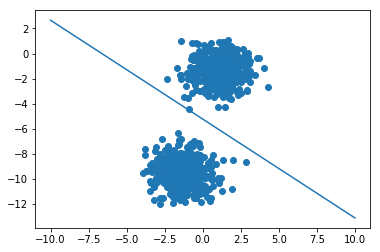

In [65]:
x1 = [-10, 10]
x2 = []

for x in x1:
    t = model.theta
    print(t, x)
    x2.append(-(t[0] + t[1]*x)/t[2])
    
plt.scatter(X[:, 0], X[:, 1])
plt.plot(x1, x2)